# Лабораторная №2

*Задание 1*<br>
Методом моментов найти оценку параметра $\theta$ равномерного распределения на [−$\theta$, $\theta$].
Найти смещение оценки, дисперсию, среднеквадратическую ошибку. Эксперимент для
$\theta$= 10

*Дано*<br>
$\theta$, U [-$\theta$, $\theta$]<br>
*Найти*<br>
Смещение оценки, E($\theta$), D($\theta$), MSE($\theta$)<br>
*Решение*<br>
$E(X)=\frac{a+b}{2}$, $D(X)=\frac{(b-a)^2}{12}$<br>
$E(|X|)=\int_{-\theta}^{\theta} |x| p(x) dx = \int_{-\theta}^{0} -x * \frac{1}{2\theta}dx + \int_{0}^{\theta} x * \frac{1}{2\theta}dx = - (\frac{-\theta^2}{4\theta}) + \frac{\theta^2}{4\theta} = \frac{\theta}{2}$<br>
$D(|X|)=E(|X|^2) - (E^2(|X|)) = E(X^2) - \frac{\theta^2}{4} = \int_{-\theta}^{\theta} x^2 * \frac{1}{2\theta}dx - \frac{\theta^2}{4} = \frac{\theta^2}{3} - \frac{\theta^2}{4} = \frac{\theta^2}{12}$<br>
$E(|X|)=\overline x$<br>
$\frac{\theta}{2}=\frac{1}{n} \sum_{i=1}^n |x_i| \Rightarrow \theta = \frac{2\sum_{i=1}^n |x_i|}{n}$<br>


$Bias(\theta)=E(\theta) - \theta \Rightarrow
E(\frac{2\sum_{i=1}^n |x_i|}{n}) - \theta = \frac{2}{n} * n * E(|x_i|) - \theta = 2 * \frac{\theta}{2} - \theta = 0$<br>

$D(\theta)=D(\frac{2\sum_{i=1}^n |x_i|}{n})=\frac{4}{n^2} * n * D(|x_i|) = \frac{4}{n} * \frac{\theta^2}{12} = \frac{\theta^2}{3n}$<br>
Так как нет смещения $MSE(\theta)=D(\theta)$<br>

In [5]:
import numpy as np

counts = []
volumes = [50, 100, 500, 1000, 2500]
theta = 10
for n in volumes:
    samples = np.random.uniform(low = -10, high = 10, size = (500, n))
    theta2 = 2 * np.mean(abs(samples), axis = 1)
    count = sum(abs(theta2 - 10) > 0.01)
    counts.append(count)
sorted(counts)

[465, 481, 483, 491, 496]

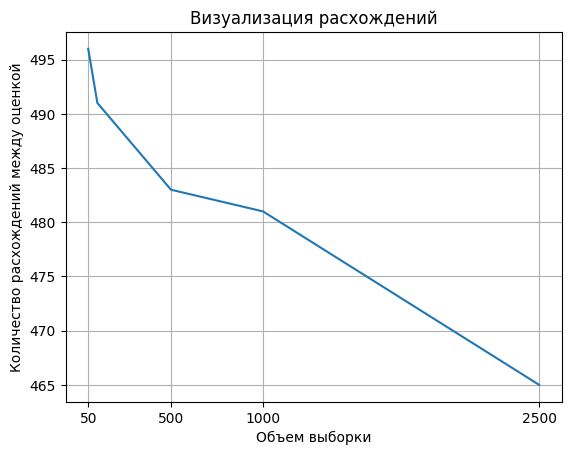

In [6]:
import matplotlib.pyplot as plt
plt.plot(volumes, counts)
plt.xlabel("Объем выборки")
plt.ylabel("Количество расхождений между оценкой")
plt.title(label = "Визуализация расхождений")
plt.xticks([50, 500, 1000, 2500])
plt.grid()
plt.show()

**Задание2**
С помощью метода моментов найти оценку параметра \theta распределения с плотностью
$p(x) = \frac{1}{(k-1)!\theta^k} x^{\left(k-1\right)} e(\frac{-x}{\theta})$
eckb k ∈ N – известный параметр. Какими свойствами обладает данная оценка? Эксперимент при $\theta$ = 2, k = 3.


$E(x) = \int_{0}^{\infty} x p(x) dx = \int_{0}^{\infty} x \frac{1}{(k-1)!\theta^k} x^{\left(k-1\right)} e(\frac{-x}{\theta}) dx = \frac{1}{(k-1)!\theta^k} \int_{0}^{\infty} x^k e(\frac{-x}{\theta}) = k\theta$ <br>
$E(x) = \overline x$ <br>
$k\theta = \frac {1}{n}\sum_{i=1}^n x_i$<br>
$\theta = \frac{\sum_{i=1}^n x_i}{kn}$
$E(\theta) = \int_{0}^{\infty} \frac{\sum_{i=1}^n x_i}{kn} dx = \frac{1}{kn} *n* E(x_i)= \frac{1}{kn}* n *k \theta  = \theta$ <br>
$Bias(\theta) = E(\theta) - \theta = \theta - \theta  = 0$ <br>
$D(\theta) = E(\theta^2) - (E(\theta))^2 = \frac{\theta^2}{kn}$
$MSE(\theta) = D(\theta)$ из-за несмещенности
$\theta = \frac{\overline X}{k}$ - эффективная оценка, т.к
$D(\theta) = \frac{\theta^2}{kn}$<br>
$ln(p(X)) = -ln((k-1)!) - kln(\theta) + (k-1)ln(x) - \frac{x}{\theta}$<br>
$\frac{\partial}{\partial\theta} ln(p(X)) = \frac{x}{\theta^2} - \frac{k}{\theta}$<br>
$E(\frac{X}{\theta ^ 2} - \frac{k}{\theta})^2 = \frac{1}{\theta ^ 4} * E(X - k * \theta)^2 = \frac {k}{\theta^2}=I(\theta)$<br>
$D(\theta)=\frac{1}{nI(\theta)}$ - неравенство Рао-Крамера <br>
$\frac{\theta^2}{kn}=\frac{1}{nI(\theta)}$





In [7]:
import numpy as np

theta = 2
k = 3
size = [50, 100, 500, 1000, 2500]
counts = []
for n in size:
  sample = np.random.gamma(shape = k, scale = theta, size = (500,n))
  theta2 = np.mean(abs(sample), axis=1) / k
  count = sum(abs(theta - theta2) > 0.01)
  counts.append(count)
sorted(counts)

[320, 381, 431, 467, 475]

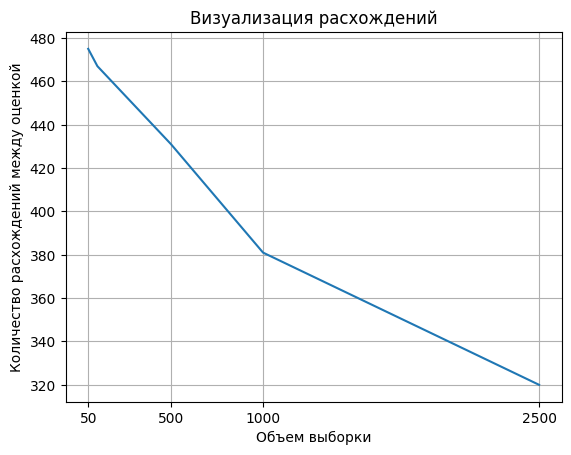

In [8]:
import matplotlib.pyplot as plt
plt.plot(volumes, counts)
plt.xlabel("Объем выборки")
plt.ylabel("Количество расхождений между оценкой")
plt.title(label = "Визуализация расхождений")
plt.xticks([50, 500, 1000, 2500])
plt.grid()
plt.show()